# Deep Q-Learning 

For this assignment we will implement the Deep Q-Learning algorithm with Experience Replay as described in breakthrough paper __"Playing Atari with Deep Reinforcement Learning"__. We will train an agent to play the famous game of __Breakout__.

In [1]:
import sys
import gym
import torch
import pylab
import random
import numpy as np
from collections import deque
from datetime import datetime
from copy import deepcopy
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from utils import *
from agent import *
from model import *
from config import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
print(device)

cuda:0


## Understanding the environment

In the following cell, we initialise our game of __Breakout__ and you can see how the environment looks like. For further documentation of the of the environment refer to https://gym.openai.com/envs. 

In [3]:
env = gym.make('BreakoutDeterministic-v4')
# env.render()

/home/andrewcaldwell/.local/lib/python3.5/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [4]:
number_lives = find_max_lifes(env)
state_size = env.observation_space.shape
action_size = 3
rewards, episodes = [], []

## Creating a DQN Agent

Here we create a DQN Agent. This agent is defined in the __agent.py__. The corresponding neural network is defined in the __model.py__. 

__Evaluation Reward__ : The average reward received in the past 100 episodes/games.

__Frame__ : Number of frames processed in total.

__Memory Size__ : The current size of the replay memory.

In [5]:
agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

### Main Training Loop

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


episode: 0   score: 0.0   memory length: 133   epsilon: 1.0    steps: 133     evaluation reward: 0.0 frames: 133
episode: 1   score: 0.0   memory length: 267   epsilon: 1.0    steps: 134     evaluation reward: 0.0 frames: 267
episode: 2   score: 3.0   memory length: 514   epsilon: 1.0    steps: 247     evaluation reward: 1.0 frames: 514
episode: 3   score: 2.0   memory length: 718   epsilon: 1.0    steps: 204     evaluation reward: 1.25 frames: 718
episode: 4   score: 1.0   memory length: 878   epsilon: 1.0    steps: 160     evaluation reward: 1.2 frames: 878
episode: 5   score: 1.0   memory length: 1038   epsilon: 0.9980694999999986    steps: 160     evaluation reward: 1.1666666666666667 frames: 1038
episode: 6   score: 0.0   memory length: 1176   epsilon: 0.9912384999999937    steps: 138     evaluation reward: 1.0 frames: 1176
episode: 7   score: 2.0   memory length: 1380   epsilon: 0.9811404999999864    steps: 204     evaluation reward: 1.125 frames: 1380
episode: 8   score: 1.0   m

episode: 59   score: 0.0   memory length: 10673   epsilon: 0.5211369999996553    steps: 126     evaluation reward: 1.2333333333333334 frames: 10673
episode: 60   score: 2.0   memory length: 10906   epsilon: 0.509603499999647    steps: 233     evaluation reward: 1.2459016393442623 frames: 10906
episode: 61   score: 0.0   memory length: 11050   epsilon: 0.5024754999996419    steps: 144     evaluation reward: 1.2258064516129032 frames: 11050
episode: 62   score: 3.0   memory length: 11298   epsilon: 0.4901994999996441    steps: 248     evaluation reward: 1.253968253968254 frames: 11298
episode: 63   score: 2.0   memory length: 11499   epsilon: 0.48024999999964807    steps: 201     evaluation reward: 1.265625 frames: 11499
episode: 64   score: 0.0   memory length: 11641   epsilon: 0.4732209999996509    steps: 142     evaluation reward: 1.2461538461538462 frames: 11641
episode: 65   score: 2.0   memory length: 11851   epsilon: 0.46282599999965507    steps: 210     evaluation reward: 1.25757

episode: 116   score: 10.0   memory length: 26906   epsilon: 0.009999999999727473    steps: 486     evaluation reward: 2.04 frames: 26906
episode: 117   score: 2.0   memory length: 27187   epsilon: 0.009999999999727473    steps: 281     evaluation reward: 2.06 frames: 27187
episode: 118   score: 3.0   memory length: 28037   epsilon: 0.009999999999727473    steps: 850     evaluation reward: 2.06 frames: 28037
episode: 119   score: 3.0   memory length: 28287   epsilon: 0.009999999999727473    steps: 250     evaluation reward: 2.06 frames: 28287
episode: 120   score: 7.0   memory length: 28662   epsilon: 0.009999999999727473    steps: 375     evaluation reward: 2.12 frames: 28662
episode: 121   score: 9.0   memory length: 29116   epsilon: 0.009999999999727473    steps: 454     evaluation reward: 2.2 frames: 29116
episode: 122   score: 4.0   memory length: 29436   epsilon: 0.009999999999727473    steps: 320     evaluation reward: 2.23 frames: 29436
episode: 123   score: 7.0   memory length

episode: 176   score: 8.0   memory length: 74076   epsilon: 0.009999999999727473    steps: 598     evaluation reward: 5.82 frames: 74076
episode: 177   score: 4.0   memory length: 74892   epsilon: 0.009999999999727473    steps: 816     evaluation reward: 5.81 frames: 74892
episode: 178   score: 5.0   memory length: 75206   epsilon: 0.009999999999727473    steps: 314     evaluation reward: 5.85 frames: 75206
episode: 179   score: 4.0   memory length: 77020   epsilon: 0.009999999999727473    steps: 1814     evaluation reward: 5.88 frames: 77020
episode: 180   score: 7.0   memory length: 77980   epsilon: 0.009999999999727473    steps: 960     evaluation reward: 5.95 frames: 77980
episode: 181   score: 9.0   memory length: 78970   epsilon: 0.009999999999727473    steps: 990     evaluation reward: 6.03 frames: 78970
episode: 182   score: 9.0   memory length: 80141   epsilon: 0.009999999999727473    steps: 1171     evaluation reward: 6.09 frames: 80141
episode: 183   score: 5.0   memory leng

episode: 235   score: 12.0   memory length: 134138   epsilon: 0.009999999999727473    steps: 614     evaluation reward: 8.13 frames: 134138
episode: 236   score: 4.0   memory length: 134782   epsilon: 0.009999999999727473    steps: 644     evaluation reward: 8.1 frames: 134782
episode: 237   score: 8.0   memory length: 135511   epsilon: 0.009999999999727473    steps: 729     evaluation reward: 8.04 frames: 135511
episode: 238   score: 7.0   memory length: 136803   epsilon: 0.009999999999727473    steps: 1292     evaluation reward: 8.04 frames: 136803
episode: 239   score: 7.0   memory length: 137579   epsilon: 0.009999999999727473    steps: 776     evaluation reward: 7.99 frames: 137579
episode: 240   score: 4.0   memory length: 138397   epsilon: 0.009999999999727473    steps: 818     evaluation reward: 7.96 frames: 138397
episode: 241   score: 6.0   memory length: 139267   epsilon: 0.009999999999727473    steps: 870     evaluation reward: 7.9 frames: 139267
episode: 242   score: 3.0  

episode: 294   score: 3.0   memory length: 187985   epsilon: 0.009999999999727473    steps: 882     evaluation reward: 7.32 frames: 187985
episode: 295   score: 5.0   memory length: 188704   epsilon: 0.009999999999727473    steps: 719     evaluation reward: 7.24 frames: 188704
episode: 296   score: 8.0   memory length: 190318   epsilon: 0.009999999999727473    steps: 1614     evaluation reward: 7.21 frames: 190318
episode: 297   score: 3.0   memory length: 191299   epsilon: 0.009999999999727473    steps: 981     evaluation reward: 7.15 frames: 191299
episode: 298   score: 4.0   memory length: 191941   epsilon: 0.009999999999727473    steps: 642     evaluation reward: 7.13 frames: 191941
episode: 299   score: 9.0   memory length: 192879   epsilon: 0.009999999999727473    steps: 938     evaluation reward: 7.16 frames: 192879
episode: 300   score: 8.0   memory length: 193526   epsilon: 0.009999999999727473    steps: 647     evaluation reward: 7.14 frames: 193526
episode: 301   score: 6.0 

episode: 353   score: 5.0   memory length: 245963   epsilon: 0.009999999999727473    steps: 513     evaluation reward: 7.43 frames: 245963
episode: 354   score: 2.0   memory length: 246479   epsilon: 0.009999999999727473    steps: 516     evaluation reward: 7.36 frames: 246479
episode: 355   score: 12.0   memory length: 247073   epsilon: 0.009999999999727473    steps: 594     evaluation reward: 7.42 frames: 247073
episode: 356   score: 3.0   memory length: 247951   epsilon: 0.009999999999727473    steps: 878     evaluation reward: 7.41 frames: 247951
episode: 357   score: 3.0   memory length: 248872   epsilon: 0.009999999999727473    steps: 921     evaluation reward: 7.34 frames: 248872
episode: 358   score: 7.0   memory length: 249392   epsilon: 0.009999999999727473    steps: 520     evaluation reward: 7.38 frames: 249392
episode: 359   score: 3.0   memory length: 249724   epsilon: 0.009999999999727473    steps: 332     evaluation reward: 7.31 frames: 249724
now time :  2018-12-20 13:

episode: 412   score: 6.0   memory length: 295667   epsilon: 0.009999999999727473    steps: 1192     evaluation reward: 6.46 frames: 295667
episode: 413   score: 4.0   memory length: 297007   epsilon: 0.009999999999727473    steps: 1340     evaluation reward: 6.4 frames: 297007
episode: 414   score: 9.0   memory length: 298249   epsilon: 0.009999999999727473    steps: 1242     evaluation reward: 6.46 frames: 298249
episode: 415   score: 5.0   memory length: 299287   epsilon: 0.009999999999727473    steps: 1038     evaluation reward: 6.48 frames: 299287
episode: 416   score: 4.0   memory length: 299882   epsilon: 0.009999999999727473    steps: 595     evaluation reward: 6.43 frames: 299882
now time :  2018-12-20 13:51:35.973675
episode: 417   score: 9.0   memory length: 300603   epsilon: 0.009999999999727473    steps: 721     evaluation reward: 6.4 frames: 300603
episode: 418   score: 9.0   memory length: 301715   epsilon: 0.009999999999727473    steps: 1112     evaluation reward: 6.41 

episode: 471   score: 14.0   memory length: 353747   epsilon: 0.009999999999727473    steps: 509     evaluation reward: 7.02 frames: 353747
episode: 472   score: 5.0   memory length: 354432   epsilon: 0.009999999999727473    steps: 685     evaluation reward: 7.02 frames: 354432
episode: 473   score: 8.0   memory length: 354726   epsilon: 0.009999999999727473    steps: 294     evaluation reward: 7.07 frames: 354726
episode: 474   score: 7.0   memory length: 355872   epsilon: 0.009999999999727473    steps: 1146     evaluation reward: 6.98 frames: 355872
episode: 475   score: 3.0   memory length: 357195   epsilon: 0.009999999999727473    steps: 1323     evaluation reward: 6.93 frames: 357195
episode: 476   score: 6.0   memory length: 357875   epsilon: 0.009999999999727473    steps: 680     evaluation reward: 6.95 frames: 357875
episode: 477   score: 10.0   memory length: 358952   epsilon: 0.009999999999727473    steps: 1077     evaluation reward: 6.97 frames: 358952
episode: 478   score: 

now time :  2018-12-20 14:54:12.354810
episode: 530   score: 5.0   memory length: 400100   epsilon: 0.009999999999727473    steps: 321     evaluation reward: 7.83 frames: 400100
episode: 531   score: 9.0   memory length: 401041   epsilon: 0.009999999999727473    steps: 941     evaluation reward: 7.84 frames: 401041
episode: 532   score: 5.0   memory length: 401857   epsilon: 0.009999999999727473    steps: 816     evaluation reward: 7.86 frames: 401857
episode: 533   score: 6.0   memory length: 403062   epsilon: 0.009999999999727473    steps: 1205     evaluation reward: 7.85 frames: 403062
episode: 534   score: 4.0   memory length: 403641   epsilon: 0.009999999999727473    steps: 579     evaluation reward: 7.76 frames: 403641
episode: 535   score: 4.0   memory length: 404361   epsilon: 0.009999999999727473    steps: 720     evaluation reward: 7.68 frames: 404361
episode: 536   score: 4.0   memory length: 404788   epsilon: 0.009999999999727473    steps: 427     evaluation reward: 7.56 fr

episode: 589   score: 17.0   memory length: 445612   epsilon: 0.009999999999727473    steps: 1820     evaluation reward: 7.62 frames: 445612
episode: 590   score: 9.0   memory length: 447057   epsilon: 0.009999999999727473    steps: 1445     evaluation reward: 7.62 frames: 447057
episode: 591   score: 6.0   memory length: 448050   epsilon: 0.009999999999727473    steps: 993     evaluation reward: 7.63 frames: 448050
episode: 592   score: 6.0   memory length: 448570   epsilon: 0.009999999999727473    steps: 520     evaluation reward: 7.64 frames: 448570
episode: 593   score: 10.0   memory length: 449332   epsilon: 0.009999999999727473    steps: 762     evaluation reward: 7.7 frames: 449332
now time :  2018-12-20 15:28:13.541848
episode: 594   score: 8.0   memory length: 450296   epsilon: 0.009999999999727473    steps: 964     evaluation reward: 7.74 frames: 450296
episode: 595   score: 15.0   memory length: 452208   epsilon: 0.009999999999727473    steps: 1912     evaluation reward: 7.8

now time :  2018-12-20 16:04:22.335554
episode: 648   score: 7.0   memory length: 500620   epsilon: 0.009999999999727473    steps: 704     evaluation reward: 9.23 frames: 500620
episode: 649   score: 6.0   memory length: 501092   epsilon: 0.009999999999727473    steps: 472     evaluation reward: 9.25 frames: 501092
episode: 650   score: 15.0   memory length: 501883   epsilon: 0.009999999999727473    steps: 791     evaluation reward: 9.36 frames: 501883
episode: 651   score: 12.0   memory length: 502849   epsilon: 0.009999999999727473    steps: 966     evaluation reward: 9.4 frames: 502849
episode: 652   score: 5.0   memory length: 503466   epsilon: 0.009999999999727473    steps: 617     evaluation reward: 9.4 frames: 503466
episode: 653   score: 5.0   memory length: 504101   epsilon: 0.009999999999727473    steps: 635     evaluation reward: 9.31 frames: 504101
episode: 654   score: 7.0   memory length: 505031   epsilon: 0.009999999999727473    steps: 930     evaluation reward: 9.34 fra

episode: 707   score: 12.0   memory length: 547904   epsilon: 0.009999999999727473    steps: 717     evaluation reward: 9.06 frames: 547904
episode: 708   score: 12.0   memory length: 549237   epsilon: 0.009999999999727473    steps: 1333     evaluation reward: 9.03 frames: 549237
episode: 709   score: 8.0   memory length: 549530   epsilon: 0.009999999999727473    steps: 293     evaluation reward: 9.03 frames: 549530
episode: 710   score: 5.0   memory length: 549861   epsilon: 0.009999999999727473    steps: 331     evaluation reward: 8.96 frames: 549861
now time :  2018-12-20 16:43:13.046955
episode: 711   score: 9.0   memory length: 550757   epsilon: 0.009999999999727473    steps: 896     evaluation reward: 8.92 frames: 550757
episode: 712   score: 4.0   memory length: 552310   epsilon: 0.009999999999727473    steps: 1553     evaluation reward: 8.81 frames: 552310
episode: 713   score: 8.0   memory length: 552707   epsilon: 0.009999999999727473    steps: 397     evaluation reward: 8.74

episode: 766   score: 13.0   memory length: 589293   epsilon: 0.009999999999727473    steps: 431     evaluation reward: 8.18 frames: 589293
episode: 767   score: 9.0   memory length: 590418   epsilon: 0.009999999999727473    steps: 1125     evaluation reward: 8.21 frames: 590418
episode: 768   score: 12.0   memory length: 590968   epsilon: 0.009999999999727473    steps: 550     evaluation reward: 8.25 frames: 590968
episode: 769   score: 8.0   memory length: 592642   epsilon: 0.009999999999727473    steps: 1674     evaluation reward: 8.29 frames: 592642
episode: 770   score: 9.0   memory length: 592992   epsilon: 0.009999999999727473    steps: 350     evaluation reward: 8.31 frames: 592992
episode: 771   score: 10.0   memory length: 593909   epsilon: 0.009999999999727473    steps: 917     evaluation reward: 8.38 frames: 593909
episode: 772   score: 14.0   memory length: 595005   epsilon: 0.009999999999727473    steps: 1096     evaluation reward: 8.44 frames: 595005
episode: 773   score

episode: 825   score: 9.0   memory length: 644240   epsilon: 0.009999999999727473    steps: 1126     evaluation reward: 9.44 frames: 644240
episode: 826   score: 9.0   memory length: 644832   epsilon: 0.009999999999727473    steps: 592     evaluation reward: 9.41 frames: 644832
episode: 827   score: 9.0   memory length: 645144   epsilon: 0.009999999999727473    steps: 312     evaluation reward: 9.38 frames: 645144
episode: 828   score: 15.0   memory length: 647333   epsilon: 0.009999999999727473    steps: 2189     evaluation reward: 9.4 frames: 647333
episode: 829   score: 10.0   memory length: 648073   epsilon: 0.009999999999727473    steps: 740     evaluation reward: 9.37 frames: 648073
episode: 830   score: 9.0   memory length: 648762   epsilon: 0.009999999999727473    steps: 689     evaluation reward: 9.43 frames: 648762
now time :  2018-12-20 18:04:45.873272
episode: 831   score: 10.0   memory length: 650271   epsilon: 0.009999999999727473    steps: 1509     evaluation reward: 9.4

AttributeError: 'Agent' object has no attribute 'model'

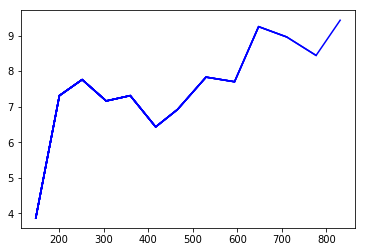

In [6]:
for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    d = False
    state = env.reset()
    life = number_lives

    get_init_state(history, state)

    while not done:
        step += 1
        frame += 1
#        if render_breakout:
#            env.render()

        # Select and perform an action
        action = agent.get_action(np.float32(history[:4, :, :]) / 255.)

        
        next_state, reward, done, info = env.step(action + 1)

        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['ale.lives'])

        life = info['ale.lives']
        r = np.clip(reward, -1, 1)

        # Store the transition in memory 
        agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame):
            agent.train_policy_net(frame)
            # Update the target network
            if(frame % Update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]

        if frame % 50000 == 0:
            print('now time : ', datetime.now())
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.savefig("./save_graph/breakout_dqn.png")

        if done:
            evaluation_reward.append(score)
            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "    evaluation reward:", np.mean(evaluation_reward), "frames:", frame)

            # if the mean of scores of last 10 episode is bigger than 400
            # stop training
            if np.mean(evaluation_reward) > 10:
                torch.save(agent.model, "./save_model/breakout_dqn")
                sys.exit()